In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
X,y = make_blobs(n_samples = 1000,centers = 3,n_features=2)

In [3]:
X

array([[ 4.57611509,  7.38204039],
       [10.52492238,  1.95112256],
       [ 4.31498964,  6.63247283],
       ...,
       [ 3.96413237, 10.63705615],
       [ 3.69394758,  9.08032138],
       [10.73398342,  3.77886497]])

In [4]:
y

array([1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 1, 0,
       0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1,
       2, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1,
       0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2,
       1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 2,
       1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0,
       1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2,

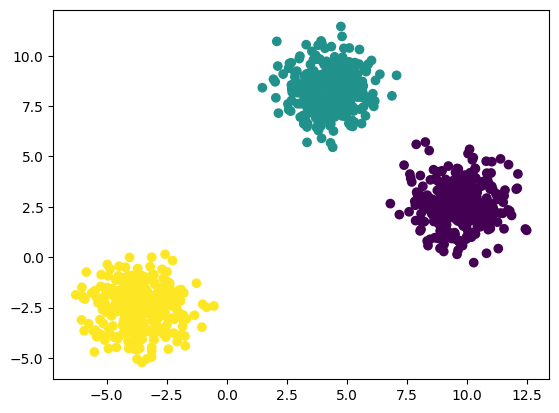

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
##So,we have the 3 Clusters

In [ ]:
###Now we will find the using the K-Means

In [11]:
### Standerdization -- Feature Scaling Technique
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 42)

In [15]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.cluster import KMeans

In [16]:
### ELbow Methods to Select the  K-value
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters = k,init = 'k-means++')
  kmeans.fit(X_train_scaled)
  wcss.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [17]:
wcss

[1915.9999999999995,
 478.0428400094466,
 77.43353748406949,
 66.6920052607002,
 56.30338305379185,
 46.5640941555537,
 41.6476267107939,
 37.408223959923944,
 34.29836071998816,
 30.750647812669452]

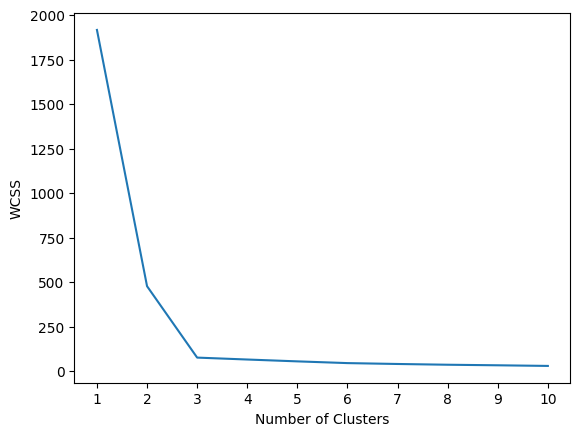

In [18]:
### WE plot the Elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

- here, we can see that,k= 3 the cluter are decrese,
- so ,we choose the k =3

In [19]:
kmeans= KMeans(n_clusters= 3 ,init = 'k-means++')
kmeans.fit(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [20]:
kmeans.fit_predict(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1,
       0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2,
       0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2,
       0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 1, 2,
       1, 0, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 1,
       1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 1,
       2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0,
       1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 2,

In [23]:
y_pred = kmeans.predict(X_test_scaled)

In [24]:
y_pred

array([1, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0,
       2, 0, 2, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2],
      dtype=int32)

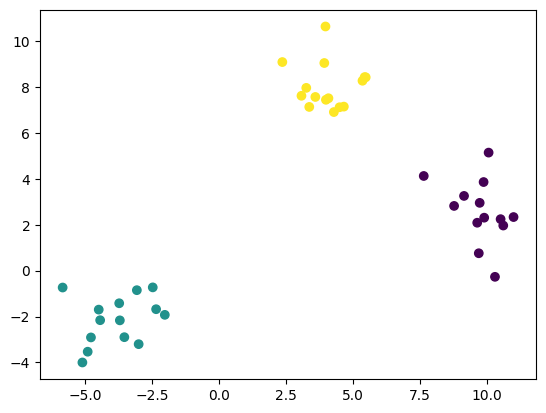

In [25]:
plt.scatter(X_test[:,0],X_test[:,1],c = y_pred)

In [ ]:
### Validating the k-value

###---------
##kneelocater
## Silhoutte  score

In [52]:
## Kneelocator
!pip install kneed

### **1. kneelocater**

In [30]:
from kneed import KneeLocator

In [37]:
k1 = KneeLocator(range(1,11),wcss,
                 curve = "convex",
                 direction = "decreasing")

In [39]:
k1.elbow

3

### **2.Silhoutte  score**

In [40]:
from sklearn.metrics import silhouette_score

In [48]:
silhoutee_coefficients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters = k,init = 'k-means++')
  kmeans.fit(X_train_scaled)
  labels = kmeans.labels_
  score = silhouette_score(X_train_scaled,labels)
  silhoutee_coefficients.append(score)


In [49]:
silhoutee_coefficients

[0.7149088245146982,
 0.8053954315877551,
 0.6361915870406801,
 0.49050500830876903,
 0.3523829851303517,
 0.3548762202817128,
 0.34400398021386835,
 0.33917707621153476,
 0.3427132719326469]

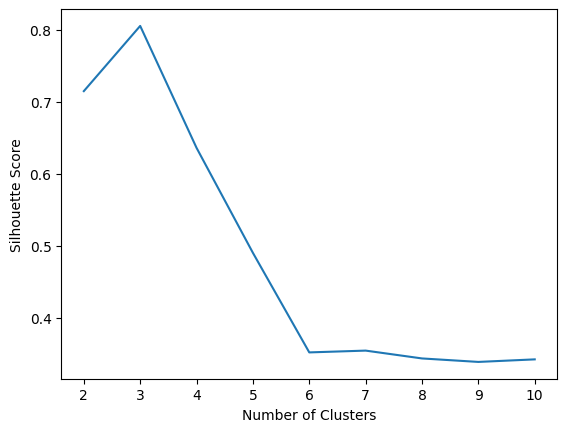

In [51]:
### Plot the shilloute Score
plt.plot(range(2,11),silhoutee_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()